In [1]:
import numpy as np
import pandas as pd
import os
from datetime import date, timedelta
%matplotlib inline
import plotly.express as px
import hvplot.pandas
import panel as pn
import seaborn as sns
from pathlib import Path
pn.extension("plotly")

In [2]:
covid_data = Path("us.csv")
covid_df = pd.read_csv(covid_data, index_col='date', parse_dates=True)
covid_df.head()

cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0

In [3]:
covid_plot = covid_df.hvplot(title = "Covid Data")
covid_plot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [4]:
covid_pct_change = covid_df.pct_change()

In [5]:
covid_pct_change_plot = covid_pct_change.hvplot(title = "Covid Percent Change")
covid_pct_change_plot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [6]:
covid_corr = covid_df.corr()
covid_corr

cases    deaths
cases   1.000000  0.952618
deaths  0.952618  1.000000

In [7]:
from pandas_datareader import data
import pandas_datareader as pdr
from datetime import datetime


end_date = datetime.now().strftime('%Y-%m-%d')

tech_stocks = data.DataReader(["AAPL", "GOOG", "AMZN", "TSLA", "NFLX", "QQQ"],
                       start='2019-08-16', 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']

tech_stocks.head()

Symbols           AAPL         AMZN         GOOG        NFLX         QQQ  \
Date                                                                       
2019-08-16  204.471252  1792.569946  1177.599976  302.799988  183.993515   
2019-08-19  208.283447  1816.119995  1198.449951  309.380005  186.919861   
2019-08-20  208.293350  1801.380005  1182.689941  298.989990  185.471573   
2019-08-21  210.550949  1823.540039  1191.250000  297.809998  187.118286   
2019-08-22  210.372726  1804.660034  1189.530029  296.929993  186.513168   

Symbols           TSLA  
Date                    
2019-08-16  219.940002  
2019-08-19  226.830002  
2019-08-20  225.860001  
2019-08-21  220.830002  
2019-08-22  222.149994

In [8]:
tech_stock_price_plot = tech_stocks.hvplot(title="Tech Stock Prices Over the Last Year")
tech_stock_price_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [9]:
end_date = datetime.now().strftime('%Y-%m-%d')

crypto = data.DataReader(["BTC-USD", "ETH-USD", "XRP-USD", "LINK-USD", "LTC-USD"],
                       start ='2019-08-16', 
                       end = end_date, 
                       data_source='yahoo')['Adj Close']

In [10]:
crypto_price_plot = crypto.hvplot(title = "Crypto Price Over The Last Year")
crypto_price_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [11]:
# Calculate Daily Returns for Tech Stocks

tech_stocks_daily_returns = tech_stocks.pct_change()
tech_stocks.head()

Symbols           AAPL         AMZN         GOOG        NFLX         QQQ  \
Date                                                                       
2019-08-16  204.471252  1792.569946  1177.599976  302.799988  183.993515   
2019-08-19  208.283447  1816.119995  1198.449951  309.380005  186.919861   
2019-08-20  208.293350  1801.380005  1182.689941  298.989990  185.471573   
2019-08-21  210.550949  1823.540039  1191.250000  297.809998  187.118286   
2019-08-22  210.372726  1804.660034  1189.530029  296.929993  186.513168   

Symbols           TSLA  
Date                    
2019-08-16  219.940002  
2019-08-19  226.830002  
2019-08-20  225.860001  
2019-08-21  220.830002  
2019-08-22  222.149994

In [12]:
# Drop nulls

tech_stocks_daily_returns.dropna(inplace=True)
tech_stocks_daily_returns.isnull().sum()

Symbols
AAPL    0
AMZN    0
GOOG    0
NFLX    0
QQQ     0
TSLA    0
dtype: int64

In [13]:
tech_stocks_daily_returns_plot = tech_stocks_daily_returns.hvplot(title="Tech Stocks Daily Returns")
tech_stocks_daily_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [14]:
# Calculate Daily Returns for Crypto

crypto_daily_returns = crypto.pct_change()
crypto_daily_returns.head()

Symbols      BTC-USD   ETH-USD  LINK-USD   LTC-USD   XRP-USD
Date                                                        
2019-08-15       NaN       NaN       NaN       NaN       NaN
2019-08-16 -0.013745  0.001335  0.030792 -0.028329  0.014312
2019-08-17  0.011148  0.047423  0.044393  0.047697  0.063697
2019-08-18  0.055118  0.044209  0.002205  0.013023  0.002412
2019-08-19 -0.014000 -0.032136 -0.049773 -0.026748 -0.026549

In [15]:
# Drop nulls

crypto_daily_returns.dropna(inplace=True)
crypto_daily_returns.isnull().sum()

Symbols
BTC-USD     0
ETH-USD     0
LINK-USD    0
LTC-USD     0
XRP-USD     0
dtype: int64

In [16]:
crypto_daily_returns_plot = crypto_daily_returns.hvplot(title="Crypto Daily Returns")
crypto_daily_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [17]:
# combined covid and tech stock pct change

combined_pct_change = pd.concat([covid_pct_change, tech_stocks_daily_returns], axis = 'columns', join= 'inner')
combined_pct_change_plot = combined_pct_change.fillna(0).hvplot(title = "Covid Percent Change Over Stock Daily Returns")
combined_pct_change_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [18]:
# Plot Cumulative Returns for tech stocks

cumulative_returns_tech = (1 + tech_stocks_daily_returns).cumprod() -1
tech_stock_cum_returns_plot = cumulative_returns_tech.hvplot(title = "Tech Stocks Cumulative Returns")
tech_stock_cum_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [19]:
# Plot Cumulative Returns for Crypto

cumulative_returns_crypto = (1 + crypto_daily_returns).cumprod() -1
crypto_cum_returns_plot = cumulative_returns_crypto.hvplot(title = "Crypto Cumulative Returns")
crypto_cum_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [20]:
# Calculate the standard deviation for tech stocks. 

tech_stocks_std = tech_stocks_daily_returns.std()
tech_stocks_std = tech_stocks_std.sort_values(ascending = False)
tech_stocks_std

Symbols
TSLA    0.050589
NFLX    0.027191
AAPL    0.026097
GOOG    0.022018
AMZN    0.021037
QQQ     0.020612
dtype: float64

In [21]:
# Determine which portfolios are riskier than the QQQ ETF

riskier_tech = tech_stocks_std[tech_stocks_std>tech_stocks_std['QQQ']]
print(riskier_tech)

Symbols
TSLA    0.050589
NFLX    0.027191
AAPL    0.026097
GOOG    0.022018
AMZN    0.021037
dtype: float64


In [22]:
# Calculate the standard deviation for crypto. 

tech_stocks_std = tech_stocks_daily_returns.std()
tech_stocks_std = tech_stocks_std.sort_values(ascending = False)
tech_stocks_std

Symbols
TSLA    0.050589
NFLX    0.027191
AAPL    0.026097
GOOG    0.022018
AMZN    0.021037
QQQ     0.020612
dtype: float64

In [23]:
# Calculate and plot the rolling standard deviation for 
# the Tech stocks using a 30 trading day window

aapl_rolling_std = tech_stocks_daily_returns['AAPL'].rolling(window=30).std().hvplot(title = "Tech Stocks 30 Day Rolling STD")
goog_rolling_std = tech_stocks_daily_returns['GOOG'].rolling(window=30).std().hvplot()
amzn_rolling_std = tech_stocks_daily_returns['AMZN'].rolling(window=30).std().hvplot()
tsla_rolling_std = tech_stocks_daily_returns['TSLA'].rolling(window=30).std().hvplot()
nflx_rolling_std = tech_stocks_daily_returns['NFLX'].rolling(window=30).std().hvplot()
qqq_rolling_std = tech_stocks_daily_returns['QQQ'].rolling(window=30).std().hvplot()

rolling_tech_plot = aapl_rolling_std*goog_rolling_std*amzn_rolling_std*tsla_rolling_std*nflx_rolling_std*qqq_rolling_std

In [24]:
rolling_tech_plot

:Overlay
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.GOOG :Curve   [Date]   (GOOG)
   .Curve.AMZN :Curve   [Date]   (AMZN)
   .Curve.TSLA :Curve   [Date]   (TSLA)
   .Curve.NFLX :Curve   [Date]   (NFLX)
   .Curve.QQQ  :Curve   [Date]   (QQQ)

In [25]:
# Calculate and plot the rolling standard deviation for 
# the Cryptocurrencies using a 30 trading day window

btc_rolling_std = crypto_daily_returns['BTC-USD'].rolling(window=30).std().hvplot(title = "Crypto 30 Day Rolling STD")
eth_rolling_std = crypto_daily_returns['ETH-USD'].rolling(window=30).std().hvplot()
link_rolling_std = crypto_daily_returns['LINK-USD'].rolling(window=30).std().hvplot()
ltc_rolling_std = crypto_daily_returns['LTC-USD'].rolling(window=30).std().hvplot()
xrp_rolling_std = crypto_daily_returns['XRP-USD'].rolling(window=30).std().hvplot()

crypto_rolling_plot = btc_rolling_std*eth_rolling_std*link_rolling_std*ltc_rolling_std*xrp_rolling_std

In [26]:
crypto_rolling_plot

:Overlay
   .Curve.BTC_hyphen_minus_USD  :Curve   [Date]   (BTC-USD)
   .Curve.ETH_hyphen_minus_USD  :Curve   [Date]   (ETH-USD)
   .Curve.LINK_hyphen_minus_USD :Curve   [Date]   (LINK-USD)
   .Curve.LTC_hyphen_minus_USD  :Curve   [Date]   (LTC-USD)
   .Curve.XRP_hyphen_minus_USD  :Curve   [Date]   (XRP-USD)

In [27]:
# Construct a correlation table for tech stocks

correlation_tech = tech_stocks_daily_returns.corr()
correlation_tech

Symbols      AAPL      AMZN      GOOG      NFLX       QQQ      TSLA
Symbols                                                            
AAPL     1.000000  0.649848  0.795699  0.523969  0.905477  0.441894
AMZN     0.649848  1.000000  0.689243  0.661907  0.760748  0.450826
GOOG     0.795699  0.689243  1.000000  0.576102  0.905087  0.492766
NFLX     0.523969  0.661907  0.576102  1.000000  0.630152  0.413692
QQQ      0.905477  0.760748  0.905087  0.630152  1.000000  0.538718
TSLA     0.441894  0.450826  0.492766  0.413692  0.538718  1.000000

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

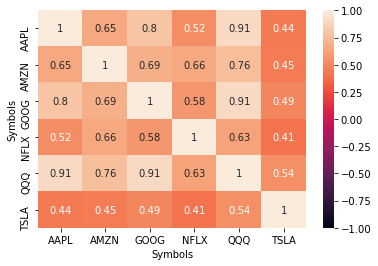

In [28]:
tech_heatmap = sns.heatmap(correlation_tech, vmin=-1, vmax=1, annot=True)
tech_heatmap

In [29]:
# Construct a correlation table for cryptocurrencies

correlation_crypto = crypto_daily_returns.corr()
correlation_crypto

Symbols    BTC-USD   ETH-USD  LINK-USD   LTC-USD   XRP-USD
Symbols                                                   
BTC-USD   1.000000  0.875073  0.597212  0.863683  0.776757
ETH-USD   0.875073  1.000000  0.668190  0.900581  0.862547
LINK-USD  0.597212  0.668190  1.000000  0.615599  0.613755
LTC-USD   0.863683  0.900581  0.615599  1.000000  0.857094
XRP-USD   0.776757  0.862547  0.613755  0.857094  1.000000

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

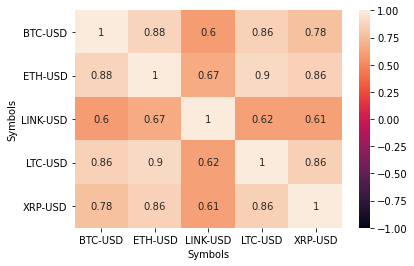

In [30]:
crypto_heatmap = sns.heatmap(correlation_crypto, vmin=-1, vmax=1, annot=True)
crypto_heatmap

In [31]:
# Calculate Beta for a single tech stock compared to the QQQ ETF

tech_rolling_covariance = tech_stocks_daily_returns['TSLA'].rolling(window=30).cov(tech_stocks_daily_returns['QQQ'])
tech_rolling_variance = tech_stocks_daily_returns['TSLA'].rolling(window=30).var()
tech_rolling_beta = tech_rolling_covariance / tech_rolling_variance

# tech_rolling_beta

tech_rolling_beta_plot = tech_rolling_beta.hvplot(title = '30 Day Rolling Beta of Tesla vs. QQQ')
tech_rolling_beta_plot

:Curve   [Date]   (0)

In [32]:
# Calculate a rolling window using the exponentially weighted moving average. 

tech_daily_returns_ewm = tech_stocks_daily_returns.ewm(halflife=30).std()
tech_stock_ewm_plot = tech_daily_returns_ewm.hvplot(title = 'Tech Stocks 30 Day EWM')
tech_stock_ewm_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [33]:
# Calculate a rolling window using the exponentially weighted moving average. 

crypto_daily_returns_ewm = crypto_daily_returns.ewm(halflife=30).std()
crypto_ewm_plot = crypto_daily_returns_ewm.hvplot(title = 'Crypto 30 Day EWM')
crypto_ewm_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [34]:
# Calculate annualized Sharpe Ratios for tech

tech_sharpe_ratios = (tech_stocks_daily_returns.mean() * 252) / (tech_stocks_daily_returns.std() * np.sqrt(252))
tech_sharpe_ratios

Symbols
AAPL    2.290246
AMZN    2.020110
GOOG    1.097834
NFLX    1.442083
QQQ     1.533952
TSLA    3.184963
dtype: float64

In [35]:
# Visualize the sharpe ratios for tech as a bar plot

tech_sharpe_plot = tech_sharpe_ratios.hvplot.bar(title = "Tech Stock Sharpe Ratios")
tech_sharpe_plot

:Bars   [Symbols]   (0)

In [36]:
# Calculate annualized Sharpe Ratios for crypto

crypto_sharpe_ratios = (crypto_daily_returns.mean() * 252) / (crypto_daily_returns.std() * np.sqrt(252))
crypto_sharpe_ratios

Symbols
BTC-USD     0.434814
ETH-USD     1.080457
LINK-USD    1.829424
LTC-USD     0.129416
XRP-USD     0.357359
dtype: float64

In [37]:
# Visualize the sharpe ratios for crypto as a bar plot

crypto_sharpe_plot = crypto_sharpe_ratios.hvplot.bar(title = "Crypto Sharpe Ratios")
crypto_sharpe_plot

:Bars   [Symbols]   (0)

## Run the monte carlo simulation for tech stocks

In [38]:
# Calculate the daily roi for the stocks

avg_daily_return_aapl = tech_stocks_daily_returns.mean()['AAPL']
avg_daily_return_goog = tech_stocks_daily_returns.mean()['GOOG']
avg_daily_return_tsla = tech_stocks_daily_returns.mean()['TSLA']
avg_daily_return_nflx = tech_stocks_daily_returns.mean()['NFLX']
avg_daily_return_amzn = tech_stocks_daily_returns.mean()['AMZN']
avg_daily_return_qqq = tech_stocks_daily_returns.mean()['QQQ']

# Display sample data

print(avg_daily_return_aapl, avg_daily_return_goog, avg_daily_return_tsla, 
      avg_daily_return_nflx, avg_daily_return_amzn, avg_daily_return_qqq)

0.003764997159107844 0.001522677066475963 0.010149943165161851 0.0024701031770998473 0.002677060125824509 0.001991751117674091


In [39]:
# Compute daily volatility

std_dev_daily_return_aapl = tech_stocks_daily_returns.std()['AAPL']
std_dev_daily_return_goog = tech_stocks_daily_returns.std()['GOOG']
std_dev_daily_return_tsla = tech_stocks_daily_returns.std()['TSLA']
std_dev_daily_return_nflx = tech_stocks_daily_returns.std()['NFLX']
std_dev_daily_return_amzn = tech_stocks_daily_returns.std()['AMZN']
std_dev_daily_return_qqq = tech_stocks_daily_returns.std()['QQQ']

print(std_dev_daily_return_aapl, std_dev_daily_return_goog, std_dev_daily_return_tsla,
      std_dev_daily_return_nflx, std_dev_daily_return_amzn, std_dev_daily_return_qqq)

0.026096526127611295 0.02201767733597011 0.05058940148293481 0.027190999144328775 0.021036978083557163 0.020612160342330262


In [40]:
# Save the last day's closing price

aapl_last_price = tech_stocks['AAPL'][-1]
goog_last_price = tech_stocks['GOOG'][-1]
tsla_last_price = tech_stocks['TSLA'][-1]
nflx_last_price = tech_stocks['NFLX'][-1]
amzn_last_price = tech_stocks['AMZN'][-1]
qqq_last_price = tech_stocks['QQQ'][-1]

In [41]:
# Setup the Monte Carlo Parameters

number_simulations = 1000
number_records = 252

monte_carlo = pd.DataFrame()

# Initialize the simulated prices list with the last closing price of tech stocks

simulated_aapl_prices = [aapl_last_price]
simulated_goog_prices = [goog_last_price]
simulated_tsla_prices = [tsla_last_price]
simulated_nflx_prices = [nflx_last_price]
simulated_amzn_prices = [amzn_last_price]
simulated_qqq_prices = [qqq_last_price]

# Initialize empty DataFrame to hold simulated prices for each simulation

simulated_price_df = pd.DataFrame()
tech_portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `500` times

for n in range(number_simulations):
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    
    simulated_aapl_prices = [aapl_last_price]
    simulated_goog_prices = [goog_last_price]
    simulated_tsla_prices = [tsla_last_price]
    simulated_nflx_prices = [nflx_last_price]
    simulated_amzn_prices = [amzn_last_price]
    simulated_qqq_prices = [qqq_last_price]
    
    # Simulate the returns for 252 days
    
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        
        simulated_aapl_price = simulated_aapl_prices[-1] * (1 + np.random.normal(avg_daily_return_aapl, std_dev_daily_return_aapl))
        simulated_goog_price = simulated_goog_prices[-1] * (1 + np.random.normal(avg_daily_return_goog, std_dev_daily_return_goog))
        simulated_tsla_price = simulated_tsla_prices[-1] * (1 + np.random.normal(avg_daily_return_tsla, std_dev_daily_return_tsla))
        simulated_nflx_price = simulated_nflx_prices[-1] * (1 + np.random.normal(avg_daily_return_nflx, std_dev_daily_return_nflx))
        simulated_amzn_price = simulated_amzn_prices[-1] * (1 + np.random.normal(avg_daily_return_amzn, std_dev_daily_return_amzn))
        simulated_qqq_price = simulated_qqq_prices[-1] * (1 + np.random.normal(avg_daily_return_qqq, std_dev_daily_return_qqq))
        
        # Append the simulated price to the list
        
        simulated_aapl_prices.append(simulated_aapl_price)
        simulated_goog_prices.append(simulated_goog_price)
        simulated_tsla_prices.append(simulated_tsla_price) 
        simulated_nflx_prices.append(simulated_nflx_price) 
        simulated_amzn_prices.append(simulated_amzn_price) 
        simulated_qqq_prices.append(simulated_qqq_price) 
        
    # Append the simulated prices of each simulation to DataFrame
    
    simulated_price_df["AAPL prices"] = pd.Series(simulated_aapl_prices)
    simulated_price_df["GOOG prices"] = pd.Series(simulated_goog_prices)
    simulated_price_df["TSLA prices"] = pd.Series(simulated_tsla_prices)
    simulated_price_df["NFLX prices"] = pd.Series(simulated_nflx_prices)
    simulated_price_df["AMZN prices"] = pd.Series(simulated_amzn_prices)
    simulated_price_df["QQQ prices"] = pd.Series(simulated_qqq_prices)
    
    # Calculate the daily returns of simulated prices
    
    simulated_daily_returns = simulated_price_df.pct_change()

In [42]:
# Tech stocks simulated daily returns for the next year 

simulated_tech_returns = simulated_daily_returns.hvplot(title = "Tech Stocks Simulated Daily Returns")
simulated_tech_returns

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [43]:
# Tech Stocks future price thru the next year

simulated_tech_price = simulated_price_df.hvplot(title = "Tech Stocks Simulated Price")
simulated_tech_price

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [44]:
# Calculate the daily roi for the stocks

avg_daily_return_btc = crypto_daily_returns.mean()['BTC-USD']
avg_daily_return_eth = crypto_daily_returns.mean()['ETH-USD']
avg_daily_return_ltc = crypto_daily_returns.mean()['LTC-USD']
avg_daily_return_link = crypto_daily_returns.mean()['LINK-USD']
avg_daily_return_xrp = crypto_daily_returns.mean()['XRP-USD']

# Display sample data

print(avg_daily_return_btc, avg_daily_return_eth, avg_daily_return_ltc, 
      avg_daily_return_link, avg_daily_return_xrp)

0.0010196811302598842 0.003173631877238897 0.0003676398753188023 0.00684732760032013 0.0008791324936444853


In [45]:
# Compute daily volatility

std_dev_daily_return_btc = crypto_daily_returns.std()['BTC-USD']
std_dev_daily_return_eth = crypto_daily_returns.std()['ETH-USD']
std_dev_daily_return_ltc = crypto_daily_returns.std()['LTC-USD']
std_dev_daily_return_link = crypto_daily_returns.std()['LINK-USD']
std_dev_daily_return_xrp = crypto_daily_returns.std()['XRP-USD']

print(std_dev_daily_return_btc, std_dev_daily_return_eth, std_dev_daily_return_ltc,
      std_dev_daily_return_link, std_dev_daily_return_xrp)

0.03722729003753088 0.04662825610824397 0.04509582162667998 0.05941649225617503 0.03905257673868686


In [46]:
# Save the last day's closing price

btc_last_price = crypto['BTC-USD'][-1]
eth_last_price = crypto['ETH-USD'][-1]
ltc_last_price = crypto['LTC-USD'][-1]
link_last_price = crypto['LINK-USD'][-1]
xrp_last_price = crypto['XRP-USD'][-1]

In [47]:
# Setup the Monte Carlo Parameters

number_simulations2 = 1000
number_records2 = 252
monte_carlo2 = pd.DataFrame()

# Initialize the simulated prices list with the last closing price of tech stocks

simulated_btc_prices = [btc_last_price]
simulated_eth_prices = [eth_last_price]
simulated_ltc_prices = [ltc_last_price]
simulated_link_prices = [link_last_price]
simulated_xrp_prices = [xrp_last_price]

# Initialize empty DataFrame to hold simulated prices for each simulation

simulated_price_df2 = pd.DataFrame()
crypto_portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times

for n in range(number_simulations2):
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    
    simulated_btc_prices = [btc_last_price]
    simulated_eth_prices = [eth_last_price]
    simulated_ltc_prices = [ltc_last_price]
    simulated_link_prices = [link_last_price]
    simulated_xrp_prices = [xrp_last_price]
    
    # Simulate the returns for 252 days
    
    for i in range(number_records2):
        
        # Calculate the simulated price using the last price within the list
        
        simulated_btc_price = simulated_btc_prices[-1] * (1 + np.random.normal(avg_daily_return_btc, std_dev_daily_return_btc))
        simulated_eth_price = simulated_eth_prices[-1] * (1 + np.random.normal(avg_daily_return_eth, std_dev_daily_return_eth))
        simulated_ltc_price = simulated_ltc_prices[-1] * (1 + np.random.normal(avg_daily_return_ltc, std_dev_daily_return_ltc))
        simulated_link_price = simulated_link_prices[-1] * (1 + np.random.normal(avg_daily_return_link, std_dev_daily_return_link))
        simulated_xrp_price = simulated_xrp_prices[-1] * (1 + np.random.normal(avg_daily_return_xrp, std_dev_daily_return_xrp))
        
        # Append the simulated price to the list
        
        simulated_btc_prices.append(simulated_btc_price)
        simulated_eth_prices.append(simulated_eth_price)
        simulated_ltc_prices.append(simulated_ltc_price) 
        simulated_link_prices.append(simulated_link_price) 
        simulated_xrp_prices.append(simulated_xrp_price)  
        
    # Append the simulated prices of each simulation to DataFrame
    
    simulated_price_df2["BTC prices"] = pd.Series(simulated_btc_prices)
    simulated_price_df2["ETH prices"] = pd.Series(simulated_eth_prices)
    simulated_price_df2["LTC prices"] = pd.Series(simulated_ltc_prices)
    simulated_price_df2["LINK prices"] = pd.Series(simulated_link_prices)
    simulated_price_df2["XRP prices"] = pd.Series(simulated_xrp_prices)
    
    # Calculate the daily returns of simulated prices
    
    simulated_daily_returns2 = simulated_price_df2.pct_change()

In [48]:
# Simulated daily returns for crypto thru the next year

simulated_crypto_daily_returns = simulated_daily_returns2.hvplot(title = "Cyrpto Simulated Daily Returns")
simulated_crypto_daily_returns

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [49]:
# Simulated cyrpto prices for the next year

simulated_crypto_prices = simulated_price_df2.hvplot(title = "Crypto Simulated Future Price")
simulated_crypto_prices

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [50]:
from pandas_datareader import data
import pandas_datareader as pdr
from datetime import datetime


end_date = datetime.now().strftime('%Y-%m-%d')

tech_stocks3 = data.DataReader(["AAPL", "GOOG", "AMZN", "TSLA", "NFLX", "QQQ"],
                       start='2019-08-16', 
                       end= '2020-05-31', 
                       data_source='yahoo')['Adj Close']

In [51]:
tech_stocks_daily_returns3 = tech_stocks3.pct_change()
tech_stocks3.tail()

Symbols           AAPL         AMZN         GOOG        NFLX         QQQ  \
Date                                                                       
2020-05-22  318.316101  2436.879883  1410.420044  429.320007  229.261322   
2020-05-26  316.159973  2421.860107  1417.020020  414.769989  228.642380   
2020-05-27  317.537476  2410.389893  1417.839966  419.890015  229.890213   
2020-05-28  317.677216  2401.100098  1416.729980  413.440002  229.590744   
2020-05-29  317.367798  2442.370117  1428.920044  419.730011  232.954895   

Symbols           TSLA  
Date                    
2020-05-22  816.880005  
2020-05-26  818.869995  
2020-05-27  820.229980  
2020-05-28  805.809998  
2020-05-29  835.000000

In [52]:
# Calculate the daily roi for the stocks

avg_daily_return_aapl3 = tech_stocks_daily_returns3.mean()['AAPL']
avg_daily_return_goog3 = tech_stocks_daily_returns3.mean()['GOOG']
avg_daily_return_tsla3 = tech_stocks_daily_returns3.mean()['TSLA']
avg_daily_return_nflx3 = tech_stocks_daily_returns3.mean()['NFLX']
avg_daily_return_amzn3 = tech_stocks_daily_returns3.mean()['AMZN']
avg_daily_return_qqq3 = tech_stocks_daily_returns3.mean()['QQQ']

# Display sample data

print(avg_daily_return_aapl3, avg_daily_return_goog3, avg_daily_return_tsla3, 
      avg_daily_return_nflx3, avg_daily_return_amzn3, avg_daily_return_qqq3)

0.0026024867253475873 0.0012595394989218546 0.00812087210049329 0.002018607939231547 0.0017883112682322512 0.0014510640649883317


In [53]:
std_dev_daily_return_aapl3 = tech_stocks_daily_returns3.std()['AAPL']
std_dev_daily_return_goog3 = tech_stocks_daily_returns3.std()['GOOG']
std_dev_daily_return_tsla3 = tech_stocks_daily_returns3.std()['TSLA']
std_dev_daily_return_nflx3 = tech_stocks_daily_returns3.std()['NFLX']
std_dev_daily_return_amzn3 = tech_stocks_daily_returns3.std()['AMZN']
std_dev_daily_return_qqq3 = tech_stocks_daily_returns3.std()['QQQ']

print(std_dev_daily_return_aapl3, std_dev_daily_return_goog3, std_dev_daily_return_tsla3,
      std_dev_daily_return_nflx3, std_dev_daily_return_amzn3, std_dev_daily_return_qqq3)

0.02716955730051464 0.023562534675100572 0.05167345488354549 0.02683077239511599 0.020895447887918757 0.022429010358380023


In [54]:
aapl_last_price3 = tech_stocks3['AAPL'][-1]
goog_last_price3 = tech_stocks3['GOOG'][-1]
tsla_last_price3 = tech_stocks3['TSLA'][-1]
nflx_last_price3 = tech_stocks3['NFLX'][-1]
amzn_last_price3 = tech_stocks3['AMZN'][-1]
qqq_last_price3 = tech_stocks3['QQQ'][-1]

In [55]:
number_simulations3 = 1000
number_records3 = 45
monte_carlo3 = pd.DataFrame()

# Initialize the simulated prices list with the last closing price of tech stocks

simulated_aapl_prices3 = [aapl_last_price3]
simulated_goog_prices3 = [goog_last_price3]
simulated_tsla_prices3 = [tsla_last_price3]
simulated_nflx_prices3 = [nflx_last_price3]
simulated_amzn_prices3 = [amzn_last_price3]
simulated_qqq_prices3 = [qqq_last_price3]

# Initialize empty DataFrame to hold simulated prices for each simulation

simulated_price_df3 = pd.DataFrame()
tech_portfolio_cumulative_returns3 = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `500` times

for n in range(number_simulations3):
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    
    simulated_aapl_prices3 = [aapl_last_price3]
    simulated_goog_prices3 = [goog_last_price3]
    simulated_tsla_prices3 = [tsla_last_price3]
    simulated_nflx_prices3 = [nflx_last_price3]
    simulated_amzn_prices3 = [amzn_last_price3]
    simulated_qqq_prices3 = [qqq_last_price3]
    
    # Simulate the returns for 252 days
    
    for i in range(number_records3):
        
        # Calculate the simulated price using the last price within the list
        
        simulated_aapl_price3 = simulated_aapl_prices3[-1] * (1 + np.random.normal(avg_daily_return_aapl3, std_dev_daily_return_aapl3))
        simulated_goog_price3 = simulated_goog_prices3[-1] * (1 + np.random.normal(avg_daily_return_goog3, std_dev_daily_return_goog3))
        simulated_tsla_price3 = simulated_tsla_prices3[-1] * (1 + np.random.normal(avg_daily_return_tsla3, std_dev_daily_return_tsla3))
        simulated_nflx_price3 = simulated_nflx_prices3[-1] * (1 + np.random.normal(avg_daily_return_nflx3, std_dev_daily_return_nflx3))
        simulated_amzn_price3 = simulated_amzn_prices3[-1] * (1 + np.random.normal(avg_daily_return_amzn3, std_dev_daily_return_amzn3))
        simulated_qqq_price3 = simulated_qqq_prices3[-1] * (1 + np.random.normal(avg_daily_return_qqq3, std_dev_daily_return_qqq3))
        
        # Append the simulated price to the list
        
        simulated_aapl_prices3.append(simulated_aapl_price3)
        simulated_goog_prices3.append(simulated_goog_price3)
        simulated_tsla_prices3.append(simulated_tsla_price3) 
        simulated_nflx_prices3.append(simulated_nflx_price3) 
        simulated_amzn_prices3.append(simulated_amzn_price3) 
        simulated_qqq_prices3.append(simulated_qqq_price3) 
        
    # Append the simulated prices of each simulation to DataFrame
    
    simulated_price_df3["AAPL prices"] = pd.Series(simulated_aapl_prices3)
    simulated_price_df3["GOOG prices"] = pd.Series(simulated_goog_prices3)
    simulated_price_df3["TSLA prices"] = pd.Series(simulated_tsla_prices3)
    simulated_price_df3["NFLX prices"] = pd.Series(simulated_nflx_prices3)
    simulated_price_df3["AMZN prices"] = pd.Series(simulated_amzn_prices3)
    simulated_price_df3["QQQ prices"] = pd.Series(simulated_qqq_prices3)
    
    # Calculate the daily returns of simulated prices
    
    simulated_daily_returns3 = simulated_price_df3.pct_change()

In [56]:
# simulated tech stock prices for June - July for monte carlo credibility

simulated_comparison_plot = simulated_price_df3.hvplot(title = "Simulated Tech Stocks June - July 2020")
simulated_comparison_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [57]:
from pandas_datareader import data
import pandas_datareader as pdr
from datetime import datetime


end_date = datetime.now().strftime('%Y-%m-%d')

tech_stocks4 = data.DataReader(["AAPL", "GOOG", "TSLA", "NFLX", "AMZN", "QQQ"],
                       start='2020-06-01', 
                       end= '2020-07-31', 
                       data_source='yahoo')['Adj Close']

# Actual tech stock data for June - July 2020 to compare against monte carlo for same time period

actual_tech_stock_comparison = tech_stocks4.hvplot(title = "Actual Tech Stock Prices for June - July 2020")
actual_tech_stock_comparison

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [58]:
# Monte Carlo of Tech Stocks for June - July side by side comparison

combined_comparison_plot = actual_tech_stock_comparison + simulated_comparison_plot
combined_comparison_plot.opts(title = " Actual Tech Stock Prices in June - July 2020 Vs. The Monte Carlo Simulated Prices")

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [61]:
row1 = pn.Row(tech_stock_price_plot, crypto_price_plot)
row2 = pn.Row(tech_stocks_daily_returns_plot, crypto_daily_returns_plot)
row3 = pn.Row(rolling_tech_plot, crypto_rolling_plot)
row4 = pn.Row(tech_stock_cum_returns_plot, crypto_cum_returns_plot)
row5 = pn.Row(actual_tech_stock_comparison, simulated_comparison_plot)
row6 = pn.Row(simulated_tech_returns, simulated_tech_price)
row7 = pn.Row(simulated_crypto_daily_returns, simulated_crypto_prices)
row8 = pn.Row(simulated_comparison_plot, actual_tech_stock_comparison)

Tab1 = pn.Column(row1, row2)
Tab2 = pn.Column(tech_rolling_beta_plot, row3, row4)
Tab3 = pn.Column(tech_stock_ewm_plot, crypto_ewm_plot)
Tab4 = pn.Column(row6, row7, row8)

In [62]:
pn.Tabs(("Covid Effect on Stocks", combined_pct_change_plot),
        ("Prices and Percent Change", Tab1),
        ("Rolling Plots and Cum Returns", Tab2),
        ("Exponentially Weighted Moving Avg", Tab3),
        ("Monte Carlo Simulations", Tab4))

Tabs
    [0] HoloViews(NdOverlay, name='Covid Effect on Stocks')
    [1] Column
        [0] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
        [1] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
    [2] Column
        [0] HoloViews(Curve)
        [1] Row
            [0] HoloViews(Overlay)
            [1] HoloViews(Overlay)
        [2] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
    [3] Column
        [0] HoloViews(NdOverlay)
        [1] HoloViews(NdOverlay)
    [4] Column
        [0] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
        [1] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
        [2] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)